In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [33]:
# load data with encode features

users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")
users_data.head()

,number_transactions,total_amount_usd,age,housing,loan,duration,campaign,pdays,previous,term_deposit,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,True,False,261,1,-1,0,False,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,True,False,151,1,-1,0,False,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,True,True,76,1,-1,0,False,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,True,False,92,1,-1,0,False,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,198,1,-1,0,False,...,0,0,0,1,0,0,0,0,1,0


In [34]:
users_data.shape

(45179, 37)

In [35]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45179 non-null  float64
 1   total_amount_usd     45179 non-null  float64
 2   age                  45179 non-null  int64  
 3   housing              45179 non-null  bool   
 4   loan                 45179 non-null  bool   
 5   duration             45179 non-null  int64  
 6   campaign             45179 non-null  int64  
 7   pdays                45179 non-null  int64  
 8   previous             45179 non-null  int64  
 9   term_deposit         45179 non-null  bool   
 10  tenure               45179 non-null  int64  
 11  job_Unknown          45179 non-null  uint8  
 12  job_admin.           45179 non-null  uint8  
 13  job_blue-collar      45179 non-null  uint8  
 14  job_entrepreneur     45179 non-null  uint8  
 15  job_housemaid        45179 non-null 

### Prepare the data for ML model

In [36]:
# define our X and y

target = users_data.total_amount_usd
features = users_data.drop(['total_amount_usd'], axis = 1)

In [37]:
target.shape

(45179,)

In [38]:
target

0        2143.0
1           0.0
2           2.0
3           0.0
4           1.0
          ...  
45211     825.0
45212    1729.0
45213    5715.0
45214       0.0
45215    2971.0
Name: total_amount_usd, Length: 45179, dtype: float64

In [39]:
features.shape

(45179, 36)

In [40]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 0)

In [10]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# question how rows and columns does the training have

Training Data
X_train shape: (31625, 36)
y_train shape: (31625,)


In [11]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (13554, 36)
y_test shape: (13554,)


### Best Model Evaluation - Random Forest

In [12]:
# what is the best model?
# identify the best model
# check for overfitting
# advanced: hyperparameter tuning 

# let's say RF is our best model
# import and fit our model
best_model = RandomForestRegressor(max_features=0.1, n_estimators =100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred[0:5])

[1916.47 1307.34   30.82 2159.63  200.98]


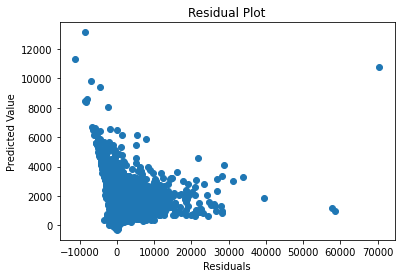

In [13]:
# for reference

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

In [14]:
# eval metrics on training set

# create y_pred_train variable, which predicts the y on training set
y_pred_train = best_model.predict(X_train)

# eval metrics on the training set
r2_train = r2_score(y_train, y_pred_train)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", round(mse))


R2: 0.87
Mean Absolute Error: 447
Mean Squared Error: 1037652


In [15]:
# eval metrics on test - same as yesterday

r2_test = r2_score(y_test, y_pred)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse))

R2: 0.08
Mean Absolute Error: 1201
Mean Squared Error: 6557092


In [41]:
# import python scripts we created to help with feature engineering
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.learning_curve_plot import learning_curve_plot

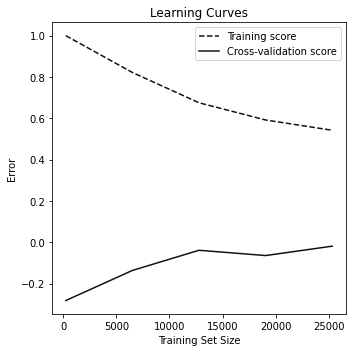

In [42]:
learning_curve_plot(best_model, X_train, y_train, scoring="r2")

## Best Model Evaluation - XGBoost

In [18]:
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred[0:5])

[1232.5426  1083.8535   191.28148 1873.5494    70.70738]


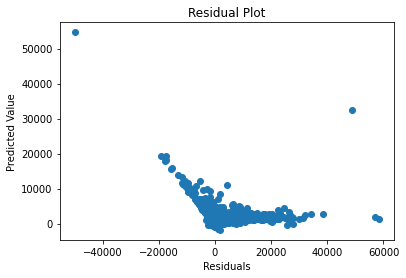

In [19]:
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

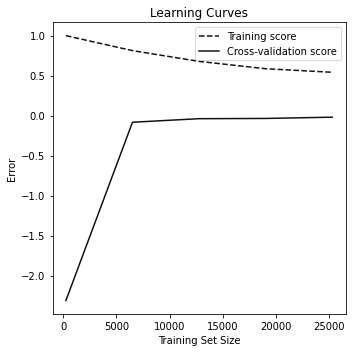

In [20]:
learning_curve_plot(best_model, X_train, y_train, scoring="r2")

In [21]:
# eval metrics on test and training set

y_pred_train = best_model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", round(mse))

R2: 0.49
Mean Absolute Error: 998
Mean Squared Error: 4041580


In [22]:
r2 = r2_score(y_test, y_pred)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse))

R2: 0.05
Mean Absolute Error: 1217
Mean Squared Error: 6764436


In [23]:
# both models are showing signs of overfitting, low r2 score and high errors.
# Next steps would include removing outliers to see if this would improve the results.
# It is also possible that this is not a useful target, and it is not possible to make
# however, some initial learnings we could take are from the feature importance plots 
# which show us some useful patterns for e.g. duration and tenure are important features

In [24]:
# identify redundant features
import pandas as pd

def identify_weakest_features(model, features_to_drop):
        """
        statistical test to remove features with the weakest relationship
        with the target variable
        """
        X = self.data.drop([self.target], axis=1) # drop target
        X = X.select_dtypes(include='bool') # keep boolean data only
        y = self.data[self.target]

        # apply chi-squared test to extract top 20 best features
        bestfeatures = SelectKBest(score_func=chi2, k=20)
        fit = bestfeatures.fit(X, y)
        df_scores = pd.DataFrame(fit.scores_)
        df_columns = pd.DataFrame(X.columns)
        feature_scores = pd.concat([df_columns, df_scores], axis=1)
        feature_scores.columns = ['Features', 'Score']  # naming the dataframe columns
        feature_scores = feature_scores.sort_values(['Score'], ascending=False)  # sorting the dataframe by Score
        to_drop = list(feature_scores.nsmallest(features_to_drop, 'Score')['Features']) # list of features to drop
        self.feature_scores = feature_scores
        self.ops['weakest_features'] = to_drop

        print('%d features with the weakest relationshp with the target variable\n' % (
            len(self.ops['weakest_features'])))


NameError: name 'n' is not defined

In [26]:
df_scores = pd.DataFrame(best_model.feature_importances_)
df_columns = pd.DataFrame(X_train.columns)

In [32]:
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Features', 'Score'] 
feature_scores.sort_values(by = ['Features'], ascending = True)

,Features,Score
1,age,0.042446
5,campaign,0.026896
29,contact_Unknown,0.012954
30,contact_cellular,0.014613
31,contact_telephone,0.059832
32,device_Unknown,0.012388
33,device_desktop,0.046562
34,device_mobile,0.010004
35,device_tablet,0.042665
4,duration,0.026267
